1 0.86 0.83
2 0.86 0.85
3 0.84 0.78
4 0.81 0.88
5 0.84 0.85
6 0.85 0.83
7 0.82 0.88
8 0.85 0.88
9 0.82 0.89
10 0.88 0.85


ValueError: x and y must have same first dimension, but have shapes (28,) and (10,)

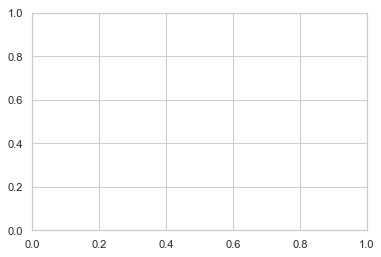

In [9]:
from sklearn.feature_selection import SelectKBest, chi2
cv_m = []
cv_acc = []
X, y = data.values[:, 1:], data.values[:, 0]   
for i in range(1,data.shape[1]): 
    ch2=SelectKBest(chi2, k=i)
    X_f = ch2.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_f, y)
    m_f = RandomForestClassifier(n_estimators=100)
    m_f.fit(X_train, y_train)
    cv_score = cross_val_score(m_f, X_train, y_train, scoring="accuracy", cv=kfold)
    cv_means = round(cv_score.mean(), 2)
    #     cv_std = round(cv_score.std(), 2)
    acc_score = round(m_f.score(X_test, y_test), 2)
    cv_m.append(cv_means)
    cv_acc.append(acc_score)
    print(i, cv_means, acc_score)

plt.plot(range(28), cv_m)

### 设定相关参数

In [72]:
# pd.set_option('precision', 2)  # 显示小数位数
# pd.set_option('max_rows', 11)  # 显示最大行数, describe需要11行
# pd.set_option('max_colwidth',40) # 最大列宽
# pd.reset_option('precision')  # 重置显示设置，其余选项类似
# %config InlineBackend.figure_format = 'svg'

### 数据基本信息

#### 查看数据基本结构

In [73]:
# dataframe.head()
# dataframe.head(), dataframe.tail(), dataframe.index, dataframe.columns, dataframe.values
# dataframe.T  # 行列互换
# dataframe.sort_values(by='age')  # 按列值排序
# dataframe[dataframe.age < 35]  # 按条件查看数据

In [74]:
# dataframe['distance'] = dataframe['distance'].fillna('1.0')
# dataframe['size'] = dataframe['size'].fillna('1.0')
# X_train = dataframe.drop('group', axis=1)
# y_train = dataframe['group']
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# acc_log = round(logreg.score(X_train, y_train) * 100, 2)
# logreg.coef_[0]

#### 设定数据类型

In [75]:
# dataframe[['group', 'menopause', 'gestation', 'pain', 'ectasia', 'multiple', 'distance', 'size']] = dataframe[[
#     'group', 'menopause', 'gestation', 'pain', 'ectasia', 'multiple', 'distance', 'size']].astype('category')
# category, int64, float64, datetime64, object
# dataframe.info()
# 确认数据结构

#### 数据基本统计信息

In [76]:
# dataframe.describe(include='all')

In [77]:
# dataframe.age.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

In [78]:
# dataframe.hist(grid=False, bins=20, figsize=(10,10), layout=(3,3));

---

#### 查看指定数据

In [79]:
# 
# dataframe.groupby('group').mean()
# dataframe[dataframe.age > 70]
# dataframe[['size','group']].groupby('size').mean()

* 数据相关性

In [80]:
# dataframe.corr(method='spearman')
# 'pearson', 'kendall', 'spearman'

### 数据可视化

In [84]:
# g = sns.FacetGrid(dataframe, col='group')
# g.map(plt.hist, 'age',bins=20)

In [85]:
# grid = sns.FacetGrid(dataframe, col='group', row='menopause')
# grid.map(plt.hist, 'age', bins=20)
# grid.add_legend();

In [86]:
# grid = sns.FacetGrid(dataframe, row='menopause')
# grid.map(sns.pointplot, 'gestation', 'group', 'ectasia', palette='deep')
# grid.add_legend()

* 单变量密度图

In [87]:
# data.plot(
#     kind='density',
#     subplots=True,
#     figsize=(10, 10),
#     layout=(3, 3),
#     sharex=False)

* 单变量箱图

In [88]:
# data.plot(
#     kind='box', subplots=True, figsize=(10, 10), layout=(3, 3), sharex=False)

* 多变量相关矩阵图

In [89]:
# import numpy as np
# correlations = data.corr()
# fig = pyplot.figure()
# ax = fig.add_subplot('111')
# ax.matshow(correlations, vmin=-1, vmax=1)
# ticks = np.arange(0, 9, 1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(data.columns)
# ax.set_yticklabels(data.columns)
# fig.set_size_inches(10, 10)

* 散点矩阵图

In [90]:
# pd.plotting.scatter_matrix(data, figsize=(15,15));

### 数据预处理

* 数据缺失值处理

In [91]:
# data = dataframe.dropna()

* 分离数据

In [92]:
# from sklearn.model_selection import train_test_split
# array = data.values
# X = array[:, 1:]
# y = array[:, 0]

1. 调整尺度

In [93]:
# from sklearn.preprocessing import MinMaxScaler
# transformer = MinMaxScaler(feature_range=(0,1))
# X = transformer.fit_transform(X)

2. 正态化数据

In [94]:
# from sklearn.preprocessing import StandardScaler
# transformer = StandardScaler().fit(X)
# X = transformer.transform(X)

3. 标准化数据

In [95]:
# from sklearn.preprocessing import Normalizer
# transformer = Normalizer().fit(X)
# X = transformer.transform(X)

4. 二值数据

In [96]:
# from sklearn.preprocessing import Binarizer
# transformer = Binarizer().fit(X)
# X = transformer.transform(X)

### 特征选择

* 单变量特征选择

In [97]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# testchi = chi2(X, Y)
# test = SelectKBest(score_func=chi2, k=2)
# fit = test.fit(X, Y)
# print(fit.scores_)
# features = fit.transform(X)
# test.get_support()

* 递归特征消除（RFE）

In [98]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(solver='lbfgs')
# rfe = RFE(model, 3)
# fit = rfe.fit(X, Y)
# print(fit.n_features_)
# print(fit.support_)
# print(fit.ranking_)

* 主要成分分析（PCA）

In [99]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# fit = pca.fit(X)
# print(fit.explained_variance_ratio_)
# print(fit.components_)

* 特征重要性

In [100]:
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier(n_estimators=100)
# fit = model.fit(X, Y)
# print(fit.feature_importances_)

* 特征数量选择

In [ ]:
# from sklearn.feature_selection import SelectKBest, chi2
# cv_m = []
# cv_acc = []
# X, y = data.values[:, 1:], data.values[:, 0]   
# for i in range(1,data.shape[1]): 
#     ch2=SelectKBest(chi2, k=i)
#     X_f = ch2.fit_transform(X, y)
#     X_train, X_test, y_train, y_test = train_test_split(X_f, y)
#     m_f = RandomForestClassifier(n_estimators=100)
#     m_f.fit(X_train, y_train)
#     cv_score = cross_val_score(m_f, X_train, y_train, scoring="accuracy", cv=kfold)
#     cv_means = round(cv_score.mean(), 2)
#     #     cv_std = round(cv_score.std(), 2)
#     acc_score = round(m_f.score(X_test, y_test), 2)
#     cv_m.append(cv_means)
#     cv_acc.append(acc_score)
#     print(i, cv_means, acc_score)

# plt.plot(range(28), cv_m)